# Exercício 1

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


import matplotlib.style as style 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams['text.usetex'] = True

### Defining the sinusoidal function

Sampling period: 0.0010 s, sampling frequency: 1000.00 Hz
Sine frequency: 80 Hz


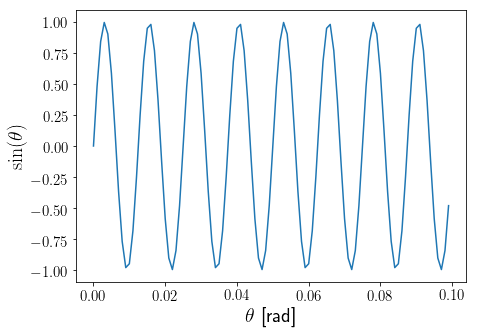

In [20]:
# sampling rate
fs = 1000;  
# sampling interval
Ts = 1.0/fs; 
# time vector
pts = np.arange(start=0, stop=np.pi/2, step=Ts)
num_pts = len(pts)
print(f'Sampling period: {Ts:.4f} s, sampling frequency: {fs:.2f} Hz')

# Sine frequency
f = 80
print(f'Sine frequency: {f} Hz')
# Sinusoidal function
s = np.sin(2*np.pi*f*pts)

pts_plot = np.arange(start=0, stop=0.1, step=Ts)

# Plotting
plt.plot(pts_plot, s[:(len(pts_plot))])
plt.xlabel(r'$\theta$~[rad]')
plt.ylabel(r'$\sin(\theta)$')
plt.axis('tight')
plt.savefig('sine.eps', transparent=True, optimize=True, bbox_inches='tight')
plt.show()


### Defining the Gaussian noise

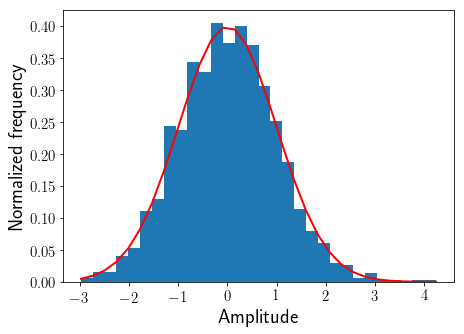

In [21]:
# Defining mean and standard deviation
mu, sigma = 0, 1
# Defing noise
n = np.random.normal(mu, sigma, num_pts)

# Plotting (what should be a Normal Distribution) histogram
count, bins, ignored = plt.hist(n, 30, density=True)
# Comparing with normal curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.xlabel('Amplitude')
plt.ylabel('Normalized frequency')
plt.axis('tight')
plt.grid(False)
plt.savefig('gaussian_noise.eps', transparent=True, optimize=True, bbox_inches='tight')
plt.show()

### Adding noise to sine function

In [ ]:
# Noise gain
k = 0.2

# Adding noise to sine
x = s + k*n

# Plotting
plt.plot(pts_plot, x[:(len(pts_plot))])
plt.xlabel(r'$\theta$~[rad]')
plt.ylabel(r'$y(\theta)$')
plt.axis('tight')
plt.savefig('sine_and_noise.eps', transparent=True, optimize=True, bbox_inches='tight')
plt.show()

### Estimating sine frequency from DFT plot

Estimated frequency: 80.20 Hz


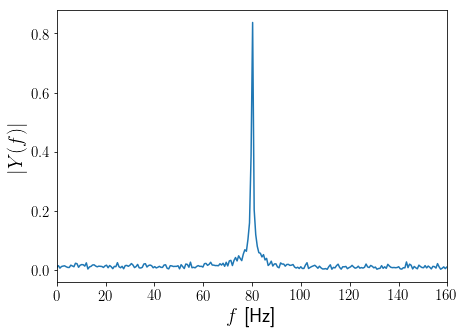

In [23]:
k = np.arange(num_pts)

T = num_pts/fs
frq = k/T 

# One side frequency range
num_pts_half = int(num_pts/2)
frq = frq[range(num_pts_half)]

# FFT computing and normalization
X = np.fft.fft(x)/num_pts_half
X = X[range(num_pts_half)]

# Plotting the spectrum
plt.xlim(left=0, right=160)
plt.plot(frq, abs(X)) 
plt.xlabel(r'$f$~[Hz]')
plt.ylabel(r'$|Y(f)|$')
plt.savefig('dft.eps', transparent=True, optimize=True, bbox_inches='tight')

argmax = np.argmax(np.absolute(X))
estimated_freq = frq[argmax]
print(f'Estimated frequency: {estimated_freq:.2f} Hz')

## GIF showing noise gain and estimated frequency relation

![atualizada](abs.gif "atualizada")

# Exercício 2

# Linear Convolution

In [27]:
x = np.array([1, 2])
h = np.array([1, 0])

## It's time time

### Sanity check using numpy convolve

In [28]:
conv = np.convolve(x, h)
print(f'Convolution using numpy convolve result: {conv}')

Convolution using numpy convolve result: [1 2 0]


### Forming my own convolution matrix

In [29]:
from scipy.linalg import toeplitz

N = len(h)
M = len(x) 
num_out  = N + M - 1

rowToe = np.append(x[0], np.zeros((1, num_out - M)))
colToe = np.append(x, np.zeros((num_out - M, 1)))
bigX = toeplitz(colToe,rowToe);

print('My convolution matrix')
print(bigX)

My convolution matrix
[[1. 0.]
 [2. 1.]
 [0. 2.]]


In [30]:
h.shape = (len(h),1)

y = np.dot(bigX, h)
print(f'Convolution with my own Toeplitz matrix result: {y.transpose()}')

Convolution with my own Toeplitz matrix result: [[1. 2. 0.]]


In [31]:
print("Let's check if the results are the same.")
print(f'It is {(y.transpose() == conv).all()}, they are the same.')

Let's check if the results are the same.
It is True, they are the same.


## It's frequency time

In [32]:
# Defining the vectors
x = np.array([1, 2])
h = np.array([1, 0])

### ---> Doing things my way: the wrong way

### Sanity check using scipy fftconvolve

In [33]:
from scipy import signal as sg
conv = sg.fftconvolve(x, h, mode='same')
print(f'Convolution result: {conv}')

Convolution result: [1. 2.]


In [34]:
from scipy.linalg import dft

print(dft(len(x)))

X = dft(len(x)).dot(x)
print('This is the DFT of x:')
print(X)

print('\n')

H = dft(len(h)).dot(h)
print('This is the DFT o h:')
print(H)

Y = H*X
print('Multiplying them, look at that result:')
print(Y)

[[ 1.+0.0000000e+00j  1.+0.0000000e+00j]
 [ 1.+0.0000000e+00j -1.-1.2246468e-16j]]
This is the DFT of x:
[ 3.+0.0000000e+00j -1.-2.4492936e-16j]


This is the DFT o h:
[1.+0.j 1.+0.j]
Multiplying them, look at that result:
[ 3.+0.0000000e+00j -1.-2.4492936e-16j]


In [35]:
from numpy.linalg import inv

# Forming the inverse DFT matrix of Y
W_y = dft(len(Y))
print(W_y)
invW_y = inv(W_y)
print(invW_y)

# Post multiplying to back Y to time domain
y = np.dot(Y, invW_y)
# Only showing the real part because the imaginary part is zero
y = y.real
print(f'Convolution result: {y}')

[[ 1.+0.0000000e+00j  1.+0.0000000e+00j]
 [ 1.+0.0000000e+00j -1.-1.2246468e-16j]]
[[ 0.5+3.061617e-17j  0.5-3.061617e-17j]
 [ 0.5-3.061617e-17j -0.5+3.061617e-17j]]
Convolution result: [1. 2.]


### ---> Doing things the right way

The right way (zero-padding to obtain linear convolution)

In [36]:
conv = sg.fftconvolve(x, h, mode='full')

# Setting the print options to show nicer-looking output
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

print(f'Convolution result: {conv}')

Convolution result: [1. 2. 0.]


In [37]:
len_h = len(h)
len_x = len(x) 
num_out  = len_h + len_x - 1

x_zp = np.append(x, np.zeros((1, num_out - len_x)))
h_zp = np.append(h, np.zeros((1, num_out - len_h)))

In [38]:
print(dft(len(x_zp)))
X = dft(len(x_zp)).dot(x_zp)
print('This is the DFT of x:')
print(X)

print('\n')

H = dft(len(h_zp)).dot(h_zp)
print('This is the DFT o h:')
print(H)

print('\n')


Y = H*X
print('I am multiplying them, look at that result:')
print(Y)

[[ 1. +0.j     1. +0.j     1. +0.j   ]
 [ 1. +0.j    -0.5-0.866j -0.5+0.866j]
 [ 1. +0.j    -0.5+0.866j -0.5-0.866j]]
This is the DFT of x:
[ 3.+0.j      0.-1.7321j -0.+1.7321j]


This is the DFT o h:
[1.+0.j 1.+0.j 1.+0.j]


I am multiplying them, look at that result:
[ 3.+0.j      0.-1.7321j -0.+1.7321j]


In [39]:
# Forming the inverse DFT matrix of Y
W_y = dft(len(Y))
invW_y = inv(W_y)
print(invW_y)
# Post multiplying to back Y to time domain
y = np.dot(Y, invW_y)
# Only showing y real part because the imaginary part is zero (cleaner output)
y = y.real

print(f"Convolution result: {y}")

[[ 0.3333+0.j      0.3333+0.j      0.3333-0.j    ]
 [ 0.3333+0.j     -0.1667+0.2887j -0.1667-0.2887j]
 [ 0.3333-0.j     -0.1667-0.2887j -0.1667+0.2887j]]
Convolution result: [1. 2. 0.]


# Overlap and Add

In [4]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [65]:
x = [1, 2, 3, 4, 5, 7, 19, 0]
h = [1, 2]

In [66]:
tam_result = len(x) + len(h) - 1    
tam_bloco = 2
tam_x = len(x)
qtd_bloco = tam_x/tam_bloco

In [68]:
print(f'Tamanho do resultado esperado: {tam_result}')
print(f'Tamanho do bloco escolhido: {tam_bloco}')
print(f'Tamanho do maior sinal: {tam_x}')
print(f'Quantidade de blocos em que o maior sinal será dividido: {int(qtd_bloco)}')

lista_blocos = list(chunks(x, tam_bloco))
print(lista_blocos)

Tamanho do resultado esperado: 9
Tamanho do bloco escolhido: 2
Tamanho do maior sinal: 8
Quantidade de blocos em que o maior sinal será dividido: 4
[[1, 2], [3, 4], [5, 7], [19, 0]]


In [69]:
conv_blocos = []
for i in range(int(qtd_bloco)):
    conv_blocos += [np.convolve(lista_blocos[i], h)]
print(conv_blocos)    

[array([1, 4, 4]), array([ 3, 10,  8]), array([ 5, 17, 14]), array([19, 38,  0])]


In [7]:
lista_antes = []
for i in range(0, tam_x, tam_bloco):
    lista_antes += [i]

lista_resp = []
for q in range(int(qtd_bloco)):
    antes = lista_antes[q]
    depois = tam_result - (tam_bloco + len(h) - 1) - antes
    zeros_antes = np.zeros(antes)
    zeros_depois = np.zeros(depois)
    if antes == 0:
        lista_resp += [np.append(conv_blocos[q], zeros_depois)]
    elif depois == 0:
        lista_resp += [np.append(zeros_antes, conv_blocos[q])]
    elif (antes == 0 and depois == 0):
         lista_resp += [conv_blocos[q]]
    else:
        lista_resp += [np.concatenate((zeros_antes, conv_blocos[q], zeros_depois))]

res = np.sum(lista_resp, 0) 
print('\n')
print(f'Então a convolução de x e h tem como resposta: {res}')
print(f'Pelo numpy a resposta é: {np.convolve(x, h)}')

Tamanho do resultado esperado: 9
Tamanho do bloco escolhido: 2
Tamanho do maior sinal: 8
Quantidade de blocos em que o maior sinal será dividido: 4


Então a convolução de x e h tem como resposta: [ 1.  4.  7. 10. 13. 17. 33. 38.  0.]
Pelo numpy a resposta é: [ 1  4  7 10 13 17 33 38  0]


# Medindo tempos de processamento

In [16]:
import time
import datetime

def time_measure(f):
    def timed(*args, **kw):
        t0 = time.time()
        result = f(*args, **kw)
        diff = int(time.time() - t0)
        diff = datetime.timedelta(seconds=diff)
        diff_str = str(diff).split(':')
        return {'return': result, 'time_processing': diff_str}

    return timed

In [29]:
@time_measure
def foo():
    i = 0
    for i in range(1, 100000000):
        i = i + i
    return i

In [37]:
@time_measure
def overlap_and_add(signal_1, signal_2, tam_bloco=2):
    
    if len(signal_1) > len(signal_2):
        x = signal_1
        h = signal_2
    else:
        x = signal_2
        h = signal_1
    if len(x) % tam_bloco != 0:
        raise NotImplementedError('erro pq tem que quebrar o bloco certinho')
    
    tam_result = len(x) + len(h) - 1    
    tam_x = len(x)
    qtd_bloco = tam_x/tam_bloco

    print(f'Tamanho do resultado esperado: {tam_result}')
    print(f'Tamanho do bloco escolhido: {tam_bloco}')
    print(f'Tamanho do maior sinal: {tam_x}')
    print(f'Quantidade de blocos em que o maior sinal será dividido: {int(qtd_bloco)}')

    lista_blocos = list(chunks(x, tam_bloco))

    conv_blocos = []
    for i in range(int(qtd_bloco)):
        conv_blocos += [np.convolve(lista_blocos[i], h)]

    lista_antes = []
    for i in range(0, tam_x, tam_bloco):
        lista_antes += [i]

    lista_resp = []
    for q in range(int(qtd_bloco)):
        antes = lista_antes[q]
        depois = tam_result - (tam_bloco + len(h) - 1) - antes
        zeros_antes = np.zeros(antes)
        zeros_depois = np.zeros(depois)
        if antes == 0:
            lista_resp += [np.append(conv_blocos[q], zeros_depois)]
        elif depois == 0:
            lista_resp += [np.append(zeros_antes, conv_blocos[q])]
        elif (antes == 0 and depois == 0):
             lista_resp += [conv_blocos[q]]
        else:
            lista_resp += [np.concatenate((zeros_antes, conv_blocos[q], zeros_depois))]

    res = np.sum(lista_resp, 0) 
    print('\n')
    print(f'Então a convolução de x e h tem como resposta: {res}')
    print(f'Pelo numpy a resposta é: {np.convolve(x, h)}')

In [38]:
x = [1, 2, 3, 4, 5, 7, 19, 0]
h = [1, 2]

In [39]:
resp = overlap_and_add(h, x)

Tamanho do resultado esperado: 9
Tamanho do bloco escolhido: 2
Tamanho do maior sinal: 8
Quantidade de blocos em que o maior sinal será dividido: 4


Então a convolução de x e h tem como resposta: [ 1.  4.  7. 10. 13. 17. 33. 38.  0.]
Pelo numpy a resposta é: [ 1  4  7 10 13 17 33 38  0]


Para fazer a medição dos tempos vou fazer diferente. Vou fazer um for gerando números aleatórios e calcular a convolução.

In [72]:
@time_measure
def overlap_add_manual():
    for i in range(int(1e3)):
        
        x = np.random.randint(low=0, high=10, size=1024)
        h = np.random.randint(low=0, high=10, size=4)
        
        tam_result = len(x) + len(h) - 1    
        tam_bloco = 2
        tam_x = len(x)
        qtd_bloco = tam_x/tam_bloco

        lista_blocos = list(chunks(x, tam_bloco))

        conv_blocos = []
        for i in range(int(qtd_bloco)):
            conv_blocos += [np.convolve(lista_blocos[i], h)]

        lista_antes = []
        for i in range(0, tam_x, tam_bloco):
            lista_antes += [i]

        lista_resp = []
        for q in range(int(qtd_bloco)):
            antes = lista_antes[q]
            depois = tam_result - (tam_bloco + len(h) - 1) - antes
            zeros_antes = np.zeros(antes)
            zeros_depois = np.zeros(depois)
            if antes == 0:
                lista_resp += [np.append(conv_blocos[q], zeros_depois)]
            elif depois == 0:
                lista_resp += [np.append(zeros_antes, conv_blocos[q])]
            elif (antes == 0 and depois == 0):
                 lista_resp += [conv_blocos[q]]
            else:
                lista_resp += [np.concatenate((zeros_antes, conv_blocos[q], zeros_depois))]

        res = np.sum(lista_resp, 0) 


In [73]:
resp = overlap_add_manual()
exec_time = resp['time_processing']
print(f'{exec_time[0]} hours, {exec_time[1]} minutes and {exec_time[2]} seconds')

0 hours, 00 minutes and 07 seconds


In [75]:
#time per operation
total_em_segundos = int(exec_time[0]*60*60) + int(exec_time[1]) * 60 + int(exec_time[2])
tempo_por_operacao = total_em_segundos/1e6
print(tempo_por_operacao)

7e-06


In [ ]:
from scipy.linalg import toeplitz

@time_measure
def topelitz_manual():
    for i in range(int(1e6)):
        x = np.random.randint(low=0, high=10, size=1024)
        h = np.random.randint(low=0, high=10, size=4)

        N = len(h)
        M = len(x) 
        num_out  = N + M - 1

        rowToe = np.append(x[0], np.zeros((1, num_out - M)))
        colToe = np.append(x, np.zeros((num_out - M, 1)))
        bigX = toeplitz(colToe,rowToe);
        y = np.dot(bigX, h)   

In [ ]:
resp = topelitz_manual()
exec_time = resp['time_processing']
print(f'{exec_time[0]} hours, {exec_time[1]} minutes and {exec_time[2]} seconds')

In [ ]:
#time per operation
total_em_segundos = exec_time[0]*60*60 + exec_time[1] * 60 + exec_time[2]
tempo_por_operacao = total_em_segundos/1e6
print(tempo_por_operacao)